In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = df['quality']

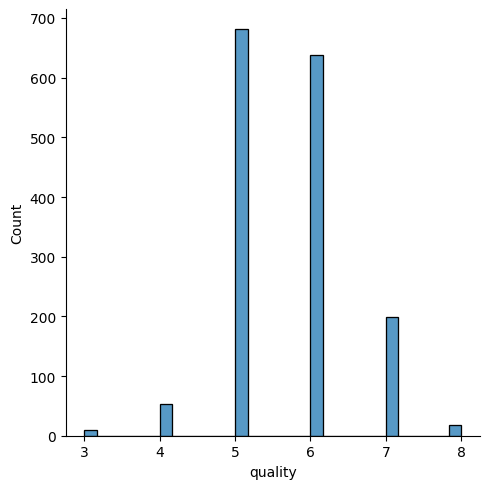

In [6]:
sns.displot(df['quality'])

<Axes: xlabel='quality', ylabel='Count'>

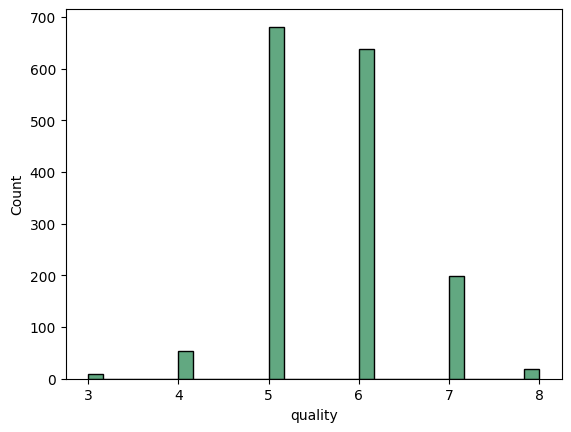

In [7]:
sns.histplot(df['quality'], color='seagreen')

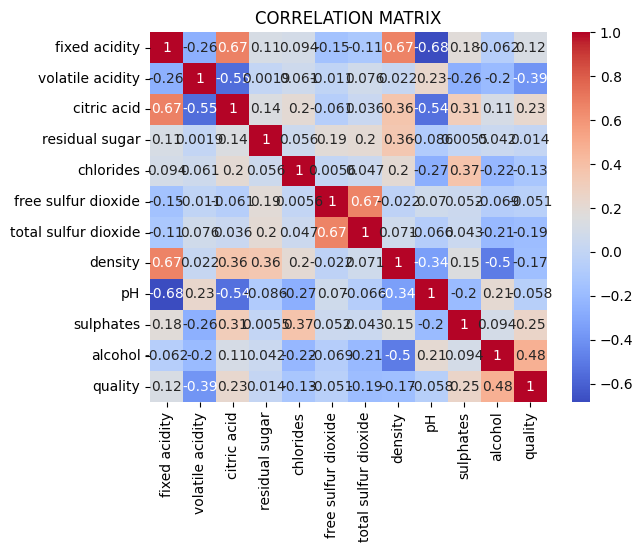

In [8]:
co_matrix = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].corr()

sns.heatmap(co_matrix, annot=True, cmap='coolwarm')
plt.title('CORRELATION MATRIX')
plt.show()

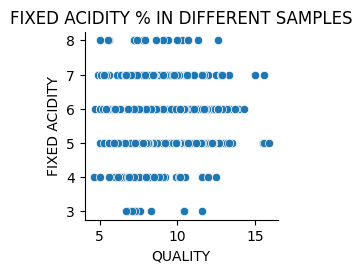

In [9]:
bx = sns.pairplot(y_vars = 'quality', x_vars = 'fixed acidity', data = df)
bx.set(xlabel = 'QUALITY', ylabel = 'FIXED ACIDITY', title = 'FIXED ACIDITY % IN DIFFERENT SAMPLES')

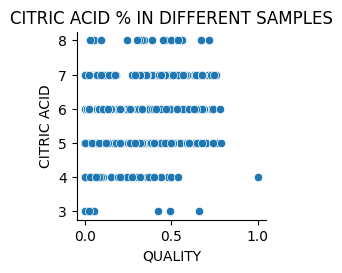

In [10]:
bx = sns.pairplot(y_vars = 'quality', x_vars = 'citric acid', data = df)
bx.set(xlabel = 'QUALITY', ylabel = 'CITRIC ACID', title = 'CITRIC ACID % IN DIFFERENT SAMPLES')

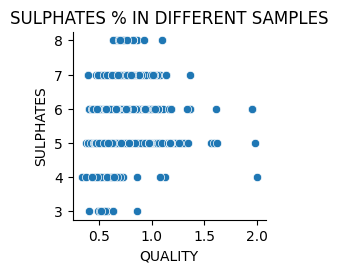

In [11]:
bx = sns.pairplot(y_vars = 'quality', x_vars = 'sulphates', data = df)
bx.set(xlabel = 'QUALITY', ylabel = 'SULPHATES', title = 'SULPHATES % IN DIFFERENT SAMPLES')

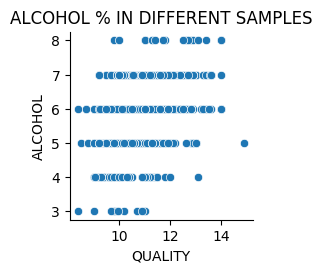

In [12]:
bx = sns.pairplot(y_vars = 'quality', x_vars = 'alcohol', data = df)
bx.set(xlabel = 'QUALITY', ylabel = 'ALCOHOL', title = 'ALCOHOL % IN DIFFERENT SAMPLES')

TRAINING AND TESTING

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)   # TRAINING THE MODEL 80% , TESTING 20% 

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(x_train, y_train)

LinearRegression()

In [17]:
reg.coef_

array([ 2.05576071e-02, -1.03451496e+00, -1.97839304e-01,  1.70394456e-02,
       -2.25333515e+00,  4.10561211e-03, -3.08339664e-03, -1.36766566e+01,
       -5.38217238e-01,  8.48682200e-01,  2.83724975e-01])

In [18]:
pd.DataFrame(reg.coef_, index= x.columns, columns= ['COEFFICIENT'])

,COEFFICIENT
fixed acidity,0.020558
volatile acidity,-1.034515
citric acid,-0.197839
residual sugar,0.017039
chlorides,-2.253335
free sulfur dioxide,0.004106
total sulfur dioxide,-0.003083
density,-13.676657
pH,-0.538217
sulphates,0.848682


In [19]:
prediction = reg.predict(x_test)

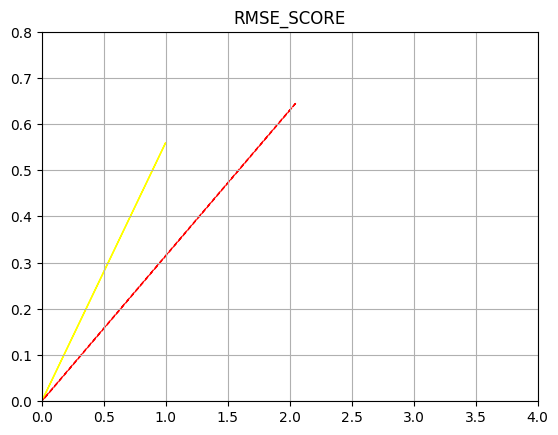

In [20]:
import matplotlib.pyplot as plt1
ax = plt1.axes()
color1 = 'red'   #RED LINE REPRESENT PREVIOUS DATA
color2 = 'yellow'    #YELLOW LINE REPRESENT PROPOSED WORK
ax.arrow(0,0,1,0.56,head_width = 0.00, head_length = 0, fc = color2, ec = color2)
ax.arrow(0,0,2,0.63,head_width = 0.00, head_length = 0.05, fc = color1, ec = color1, linestyle = '--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_SCORE')

plt1.show()

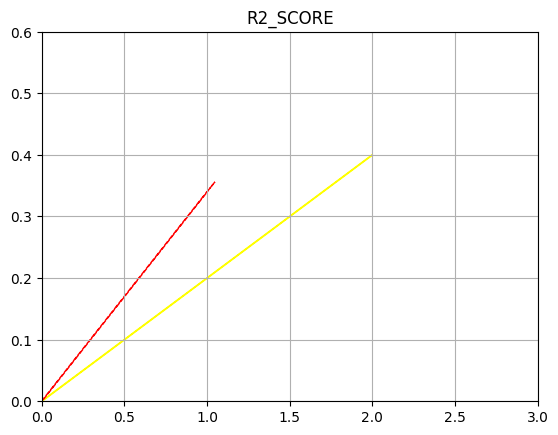

In [21]:
import matplotlib.pyplot as plt1
ax = plt1.axes()
color1 = 'red'
color2 = 'yellow'
ax.arrow(0,0,2,0.40,head_width = 0.00, head_length = 0, fc = color2, ec = color2)
ax.arrow(0,0,1,0.34,head_width = 0.00, head_length = 0.05, fc = color1, ec = color1, linestyle = '--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('R2_SCORE')

plt1.show()

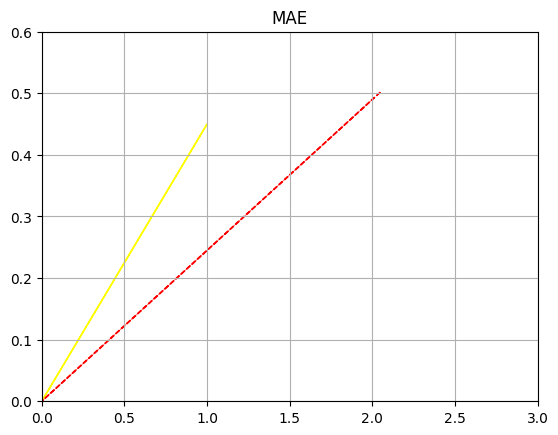

In [22]:
import matplotlib.pyplot as plt1
ax = plt1.axes()
color1 = 'red'
color2 = 'yellow'
ax.arrow(0,0,1,0.45,head_width = 0.00, head_length = 0, fc = color2, ec = color2)
ax.arrow(0,0,2,0.49,head_width = 0.00, head_length = 0.05, fc = color1, ec = color1, linestyle = '--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')        # Main Affluent Error

plt1.show()

PREDICTION

In [23]:
reg.predict([[8, 0.5, 0.15, 1.9, 0.07, 23.0, 35.0, 0.92, 3.5, 0.65, 10.2]])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.63775678])